In [198]:
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
# Load data
df = pd.read_csv("OnlineRetail.csv", encoding="latin1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### EDA

In [200]:
# Pastikan InvoiceDate dalam datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Ambil jam transaksi
df["Hour"] = df["InvoiceDate"].dt.hour

# 1. Produk paling sering dibeli
top_products = df["StockCode"].value_counts().head(20)

# 2. Customer paling sering transaksi
top_customers = df["CustomerID"].value_counts().head(20)

# 3. Jam transaksi paling ramai
hourly = df["Hour"].value_counts().sort_index()

# 4. Sebaran harga
unit_price = df[df["UnitPrice"] > 0]["UnitPrice"]
unit_price = unit_price[unit_price < 10]

# 5. Negara dengan transaksi terbanyak
country_counts = df["Country"].value_counts()

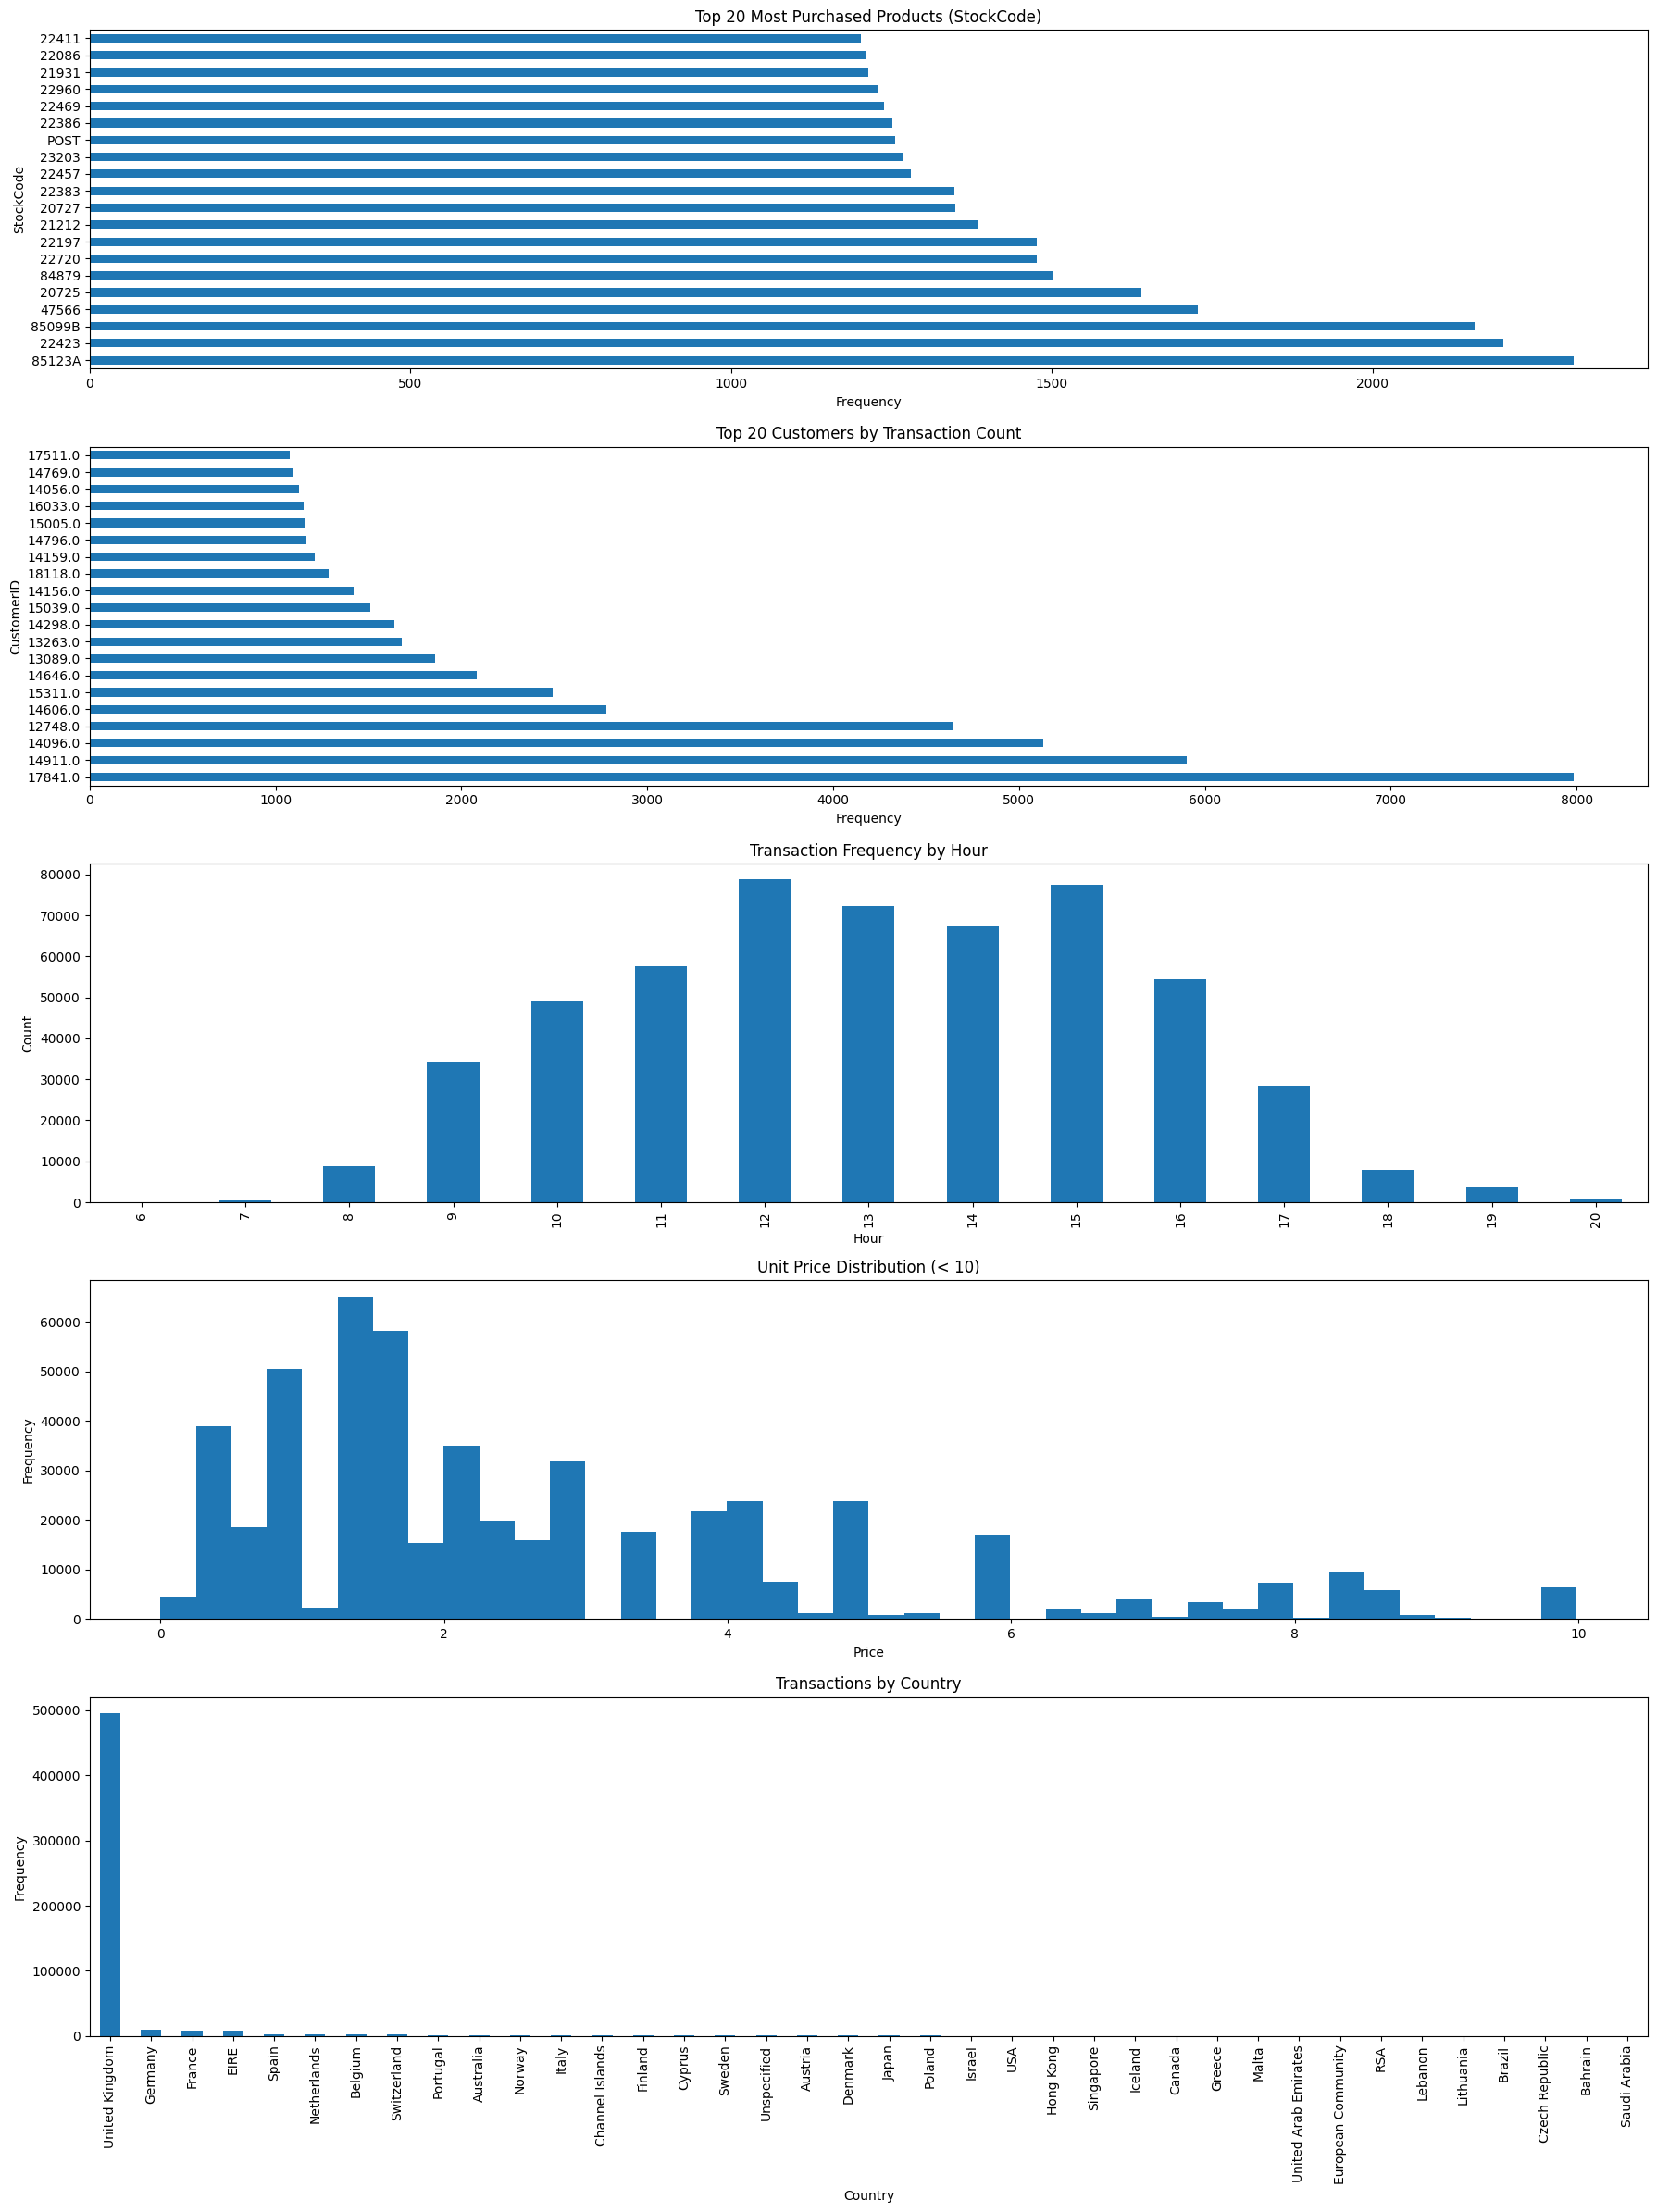

In [201]:

# Plot
plt.figure(figsize=(18, 24))

# Produk
plt.subplot(5, 1, 1)
top_products.plot(kind="barh")
plt.title("Top 20 Most Purchased Products (StockCode)")
plt.xlabel("Frequency")

# Customer
plt.subplot(5, 1, 2)
top_customers.plot(kind="barh")
plt.title("Top 20 Customers by Transaction Count")
plt.xlabel("Frequency")

# Jam transaksi
plt.subplot(5, 1, 3)
hourly.plot(kind="bar")
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")

# Sebaran harga
plt.subplot(5, 1, 4)
plt.hist(unit_price, bins=40)
plt.title("Unit Price Distribution (< 10)")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Negara
plt.subplot(5, 1, 5)
country_counts.plot(kind="bar")
plt.title("Transactions by Country")
plt.xlabel("Country")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [202]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Hour         541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 35.1+ MB


In [203]:
# Cek jumlah missing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Hour                0
dtype: int64

In [204]:
# persentase  missing
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
print(missing_percent)


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Hour            0.00
dtype: float64


hapus saja customerid yang missing, untuk description biarkan saja

In [205]:
# Hapus baris tanpa CustomerID
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
dtype: int64

In [206]:
# Cek duplikasi
df.duplicated().sum()

np.int64(5225)

In [207]:
# Hapus duplikasi
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Hour         401604 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 29.1+ MB


In [208]:
# Hapus transaksi dengan Quantity ≤ 0 atau UnitPrice ≤ 0 (hanya ambil yg > 0)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Hour         392692 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


setelah preprocessing, rows turun dari 500.000 an jadi 390.000 an. Masih aman

In [209]:
# Buat kolom TotalPrice untuk Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34


In [210]:
# Tentukan snapshot date 1 hari setelah transaksi terakhir
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalPrice':'Monetary'}, inplace=True)

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
